#### 필수 목표

분석 흐름 개요
- 데이터 EDA
- 데이터 정제 및 데이터 전처리
- 데이터 시각화 및 분석
- 데이터 기반 인사이트 도출

1. [비즈니스 목표 세우기]

2. [사용된 데이터 소스 설명] 출처, 구성, 관측단위, 주요 변수를 소개
- 관측 단위와 기간
    - 관측 단위: Fitbit 사용자(30명) × 활동/수면/심박 데이터, 사용자-일(Day)
    - 기간: 2016년 3월 12일 ~ 2016년 5월 12일(62일)
- 주요 변수 소개: 하드/노말/소프트 유저, 활동날짜()

3. [EDA] 행/열 개수를 제시
- 로딩 직후와 정제 후를 구분해서 행·열 개수(shape)와 결측치 개수를 각각 보고하기

4. [EDA] 분석할 데이터의 컬럼 타입과 기술통계(min/median/mean/max, 결측치 수)를 제시

5. [전처리 과정] 결측치/이상치/전처리 처리 규칙을 수립·실행하고, 처리 이유를 작성

6. [주요 분석제시 및 시각화] 한개 혹은 여러개의 기준 컬럼을 두고 집계함수로 비교분석 후 시각화

7. [인사이트 제시 ]최소 1개 이상의 인사이트를 수치/그래프/그림/해석으로 제시

#### 심화 목표

1. EDA를 더 다양한 형식(산점도, 박스플롯  등)으로 나타내보기

2. 사용자별 평균 활동량(예: mean_steps)을 기준으로 상위 20% / 하위 20% 그룹을 만들어 주요 지표(걸음수, 칼로리, 비활동 시간 등)를 비교

3. 월별/분기별 평균 활동량을 계산해 장기 추세(증가·감소)와 계절성(예: 여름·겨울 차이)을 파악

4. 요일별·시간대별 평균 Steps(또는 활동 비율)를 히트맵으로 그려 피크 시간대를 파악하고, 주중 vs 주말 차이를 분석


In [29]:
import pandas as pd
df = pd.read_csv("../data/dailyActivity_merged.csv")
df2 = df.copy() # 카피본

df2.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [ ]:
df2.info()
# 15 컬럼, 940행, 대체로 숫자형 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [ ]:
# 전체 데이터 기술통계
df2.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [ ]:
# 결측치 확인
df2.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [ ]:
# ID별 총 걸음 수 확인
df2.groupby('Id')['TotalSteps'].mean()

In [52]:
# 날짜 타입 변환

df2 = df.copy()

df2["ActivityDate"] = pd.to_datetime(df2["ActivityDate"])

# 요일 변수 생성
df2["weekday"] = df2["ActivityDate"].dt.day_name()

# 활동강도 합산 지표 생성
df2["TotalActiveMinutes"] = (df2["VeryActiveMinutes"]
                            + df2["FairlyActiveMinutes"]
                            + df2["LightlyActiveMinutes"])


In [53]:
# 미착용일 조건 정의
non_wear_cond = (
    (df2["TotalSteps"] == 0) &
    (df2["TotalDistance"] == 0) &
    (df2["SedentaryMinutes"] >= 1380)   # 하루 23시간 이상 앉아있음
)

# 미착용일 제외
clean_df2 = df2.loc[~non_wear_cond].copy()

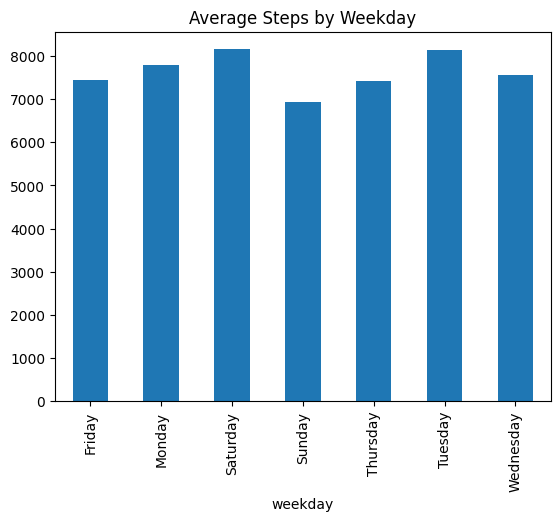

In [34]:
import matplotlib.pyplot as plt
# 요일별 평균 걸음수
weekday_steps = df2.groupby("weekday")["TotalSteps"].mean()
weekday_steps.plot(kind="bar", title="Average Steps by Weekday")
plt.show()